In [1]:
import pandas as pd
import numpy as np
false_df = pd.read_csv('Fake.csv')
true_df = pd.read_csv('True.csv')
print(false_df.columns)
print(true_df.columns)

Index(['title', 'text', 'subject', 'date'], dtype='object')
Index(['title', 'text', 'subject', 'date'], dtype='object')


In [2]:
false_df['label'] = 0
true_df['label'] = 1
data = pd.concat([false_df, true_df], ignore_index=True)
data.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [3]:
df = pd.DataFrame(data)
df = df.drop(columns=['subject'])
df = df.drop(columns=['date'])
df.head()

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0


In [4]:
data.duplicated().sum()

209

In [5]:
data.drop_duplicates(inplace = True)
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

,0
title,0
text,0
subject,0
date,0
label,0


In [7]:
df['combined'] = df['title'] + ' ' + df['text']
df.drop(columns=['title', 'text'], inplace=True)
df.head()

,label,combined
0,0,Donald Trump Sends Out Embarrassing New Year’...
1,0,Drunk Bragging Trump Staffer Started Russian ...
2,0,Sheriff David Clarke Becomes An Internet Joke...
3,0,Trump Is So Obsessed He Even Has Obama’s Name...
4,0,Pope Francis Just Called Out Donald Trump Dur...


In [8]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [11]:
df['combined'] = df['combined'].str.lower()
df['tokenized_text'] = df['combined'].apply(word_tokenize)
print(df["tokenized_text"].head())

0    [donald, trump, sends, out, embarrassing, new,...
1    [drunk, bragging, trump, staffer, started, rus...
2    [sheriff, david, clarke, becomes, an, internet...
3    [trump, is, so, obsessed, he, even, has, obama...
4    [pope, francis, just, called, out, donald, tru...
Name: tokenized_text, dtype: object


In [12]:
stop_word = {'a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', 'aren','as',
 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'd', 'did', 'do', 'does',
 'doing', 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'has',
 'have',
 'haven',
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'more',
 'most',
 'my',
 'myself',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's',
 'same',
 'shan',
 'she',
 "she's",
 'should',
 "should've",
 'shouldn',
 'so',
 'some',
 'such',
 't',
 'than',
 'that',
 "that'll",
 'the',
 'their',
 'theirs',
 'them',
 'themselves',
 'then',
 'there',
 'these',
 'they',
 'this',
 'those',
 'through',
 'to',
 'too',
 'under',
 'until',
 'up',
 've',
 'very',
 'was',
 'wasn',
 'we',
 'were',
 'weren',
 'what',
 'when',
 'where',
 'which',
 'while',
 'who',
 'whom',
 'why',
 'will',
 'with',
 'won',
 'y',
 'you',
 "you'd",
 "you'll",
 "you're",
 "you've",
 'your',
 'yours',
 'yourself',
 'yourselves'}
df['filtered_text'] = df['tokenized_text'].apply(lambda tokens: [token for token in tokens if token not in stop_word])
print(df[[ 'tokenized_text', 'filtered_text']].head())

                                      tokenized_text  \
0  [donald, trump, sends, out, embarrassing, new,...   
1  [drunk, bragging, trump, staffer, started, rus...   
2  [sheriff, david, clarke, becomes, an, internet...   
3  [trump, is, so, obsessed, he, even, has, obama...   
4  [pope, francis, just, called, out, donald, tru...   

                                       filtered_text  
0  [donald, trump, sends, embarrassing, new, year...  
1  [drunk, bragging, trump, staffer, started, rus...  
2  [sheriff, david, clarke, becomes, internet, jo...  
3  [trump, obsessed, even, obama, ’, name, coded,...  
4  [pope, francis, called, donald, trump, christm...  


In [13]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [18]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return 'a'
    elif treebank_tag.startswith('V'):
        return 'v'
    elif treebank_tag.startswith('N'):
        return 'n'
    elif treebank_tag.startswith('R'):
        return 'r'
    else:
        return 'n'
lemmatizer = WordNetLemmatizer()
def lemmatize_words(word_list):
    pos_tags = nltk.pos_tag(word_list)
    lemmatized_tokens = [
        lemmatizer.lemmatize(token, pos=get_wordnet_pos(pos)) for token, pos in pos_tags
    ]
    return lemmatized_tokens
df['lemmatized_text'] = df['filtered_text'].apply(lemmatize_words)
print(df[['filtered_text', 'lemmatized_text']].head())

                                       filtered_text  \
0  [donald, trump, sends, embarrassing, new, year...   
1  [drunk, bragging, trump, staffer, started, rus...   
2  [sheriff, david, clarke, becomes, internet, jo...   
3  [trump, obsessed, even, obama, ’, name, coded,...   
4  [pope, francis, called, donald, trump, christm...   

                                     lemmatized_text  
0  [donald, trump, sends, embarrass, new, year, ’...  
1  [drunk, brag, trump, staffer, start, russian, ...  
2  [sheriff, david, clarke, become, internet, jok...  
3  [trump, obsess, even, obama, ’, name, cod, web...  
4  [pope, francis, call, donald, trump, christmas...  


In [19]:
import gensim
from gensim.models import Word2Vec , KeyedVectors
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')
vec_king = wv['king']

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [20]:
vec_king

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

In [21]:
def get_average_vector(lemmatized_words):
    word_vectors = [wv[word] for word in lemmatized_words if word in wv]
    if len(word_vectors) == 0:
        return np.zeros(wv.vector_size)
    return np.mean(word_vectors, axis=0)

df['vectorized_text'] = df['lemmatized_text'].apply(get_average_vector)

print(df['vectorized_text'].head())

0    [0.020825172, 0.03787536, 0.028547114, 0.10977...
1    [-0.015692323, 0.006309694, 0.011469616, 0.069...
2    [0.0062485733, 0.023896204, 0.010799135, 0.070...
3    [-0.009449037, 0.011985526, 0.020117957, 0.106...
4    [0.03280812, 0.04518942, 0.03020688, 0.1297098...
Name: vectorized_text, dtype: object


In [22]:
from sklearn.model_selection import train_test_split
X = np.array(df['vectorized_text'].tolist())
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [26]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 0, 0])

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9461024498886415
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      4733
           1       0.95      0.93      0.94      4247

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980

Confusion Matrix:
 [[4536  197]
 [ 287 3960]]


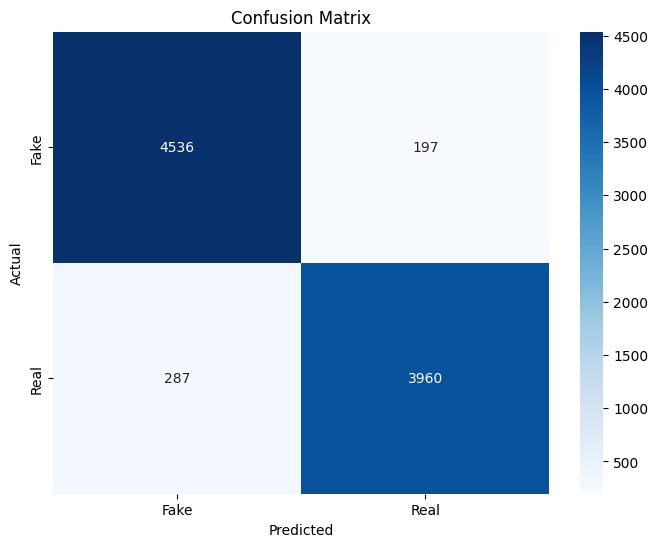

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [33]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.2 MB/s eta 0:00:00


In [36]:
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 300)
    max_depth = trial.suggest_int("max_depth", 5, 50)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    scores = cross_val_score(rf, X_train, y_train, cv=5, scoring="accuracy")
    return scores.mean()

In [39]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50 , timeout=600)
print("Best Parameters:", study.best_params)
print("Best Accuracy:", study.best_value)

[I 2024-11-16 00:46:36,827] A new study created in memory with name: no-name-427d8246-fcd4-43e5-b4e3-2eb4ec220dbf
[I 2024-11-16 00:50:55,065] Trial 0 finished with value: 0.9293390621322863 and parameters: {'n_estimators': 74, 'max_depth': 18, 'min_samples_split': 19, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.9293390621322863.
[I 2024-11-16 01:00:07,691] Trial 1 finished with value: 0.9310373811650685 and parameters: {'n_estimators': 166, 'max_depth': 21, 'min_samples_split': 13, 'min_samples_leaf': 8}. Best is trial 1 with value: 0.9310373811650685.


Best Parameters: {'n_estimators': 166, 'max_depth': 21, 'min_samples_split': 13, 'min_samples_leaf': 8}
Best Accuracy: 0.9310373811650685


In [41]:
import joblib

joblib.dump(rf_clf, 'random_forest_news_classifier.pkl')

['random_forest_news_classifier.pkl']